In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import pandas as pd

In [80]:
'''Import Data'''
temp = pd.read_csv('./ROS data - Temperature.csv', 
                   parse_dates = ['Date'])
density = pd.read_csv('./ROS data - Density.csv', 
                   parse_dates = ['Date'])
stratigraphy = pd.read_csv('./ROS data - Stratigtaphy.csv', 
                   parse_dates = ['Date'])

In [20]:
temp.head()

,Site_ID,BeforeAfter,Date,Height,Temp,AirTemp
0,AMC_forest,before,2024-01-08,23.5,-5.0,-5.0
1,AMC_forest,before,2024-01-08,20.0,-4.0,-5.0
2,AMC_forest,before,2024-01-08,10.0,-2.0,-5.0
3,AMC_forest,before,2024-01-08,0.0,-1.0,-5.0
4,AMC_forest,after,2024-01-11,28.5,-1.0,-1.0


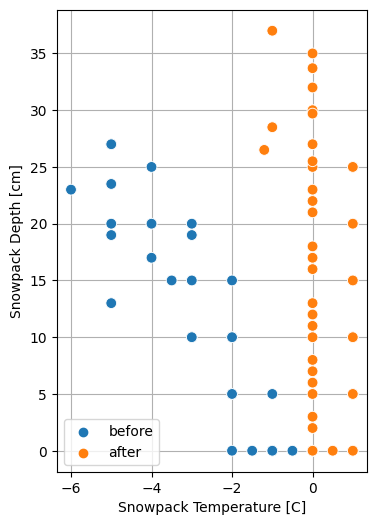

In [44]:
'''Scatter plot - temp and snow depth'''
fig, ax = plt.subplots(1, 1, figsize = (4, 6))
ax.grid(visible=True)

#Plot data
sns.scatterplot(data = temp, y = 'Height', x = 'Temp', hue = 'BeforeAfter',
                s = 60, zorder = 4)

ax.set_ylabel('Snowpack Depth [cm]')
ax.set_xlabel('Snowpack Temperature [C]')
ax.legend(title = None, loc = 'lower left')

plt.savefig('./plots/SnowPackTemp-plot.svg')
plt.savefig('./plots/SnowPackTemp-plot.pdf')
plt.show()


In [37]:
density.head()

,Site_ID,BeforeAfter,Date,SampleH_top_cm,SampleH_bottom_cm,WeightA_g,WeightB_g,WeightC_g,AvgWeight_g,TotalDepth_cm,Cutter_volume_cm3,Density_kgm3,SWE_layer_mm,SWE_site_mm
0,AMC_clearing1,Before,2024-01-08,27.0,17.0,22,19,24.0,21.7,27.0,250,86.7,8.7,37.9
1,AMC_clearing1,Before,2024-01-08,17.0,7.0,47,50,NaN,48.5,27.0,250,194.0,19.4,37.9
2,AMC_clearing2,Before,2024-01-08,27.0,17.0,39,22,21.0,27.3,27.0,250,109.3,10.9,43.6
3,AMC_clearing2,Before,2024-01-08,17.0,7.0,55,52,53.0,53.3,27.0,250,213.3,21.3,43.6
4,AMC_clearing3,Before,2024-01-08,19.0,9.0,27,24,NaN,25.5,19.0,250,102.0,10.2,28.2


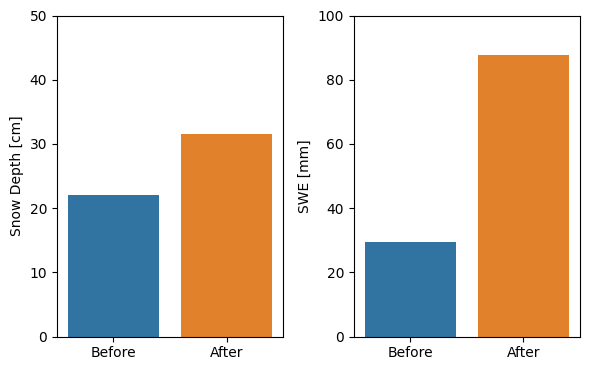

In [72]:
'''Barplot - snowdepth and SWE before and after'''
fig, [ax, ax2] = plt.subplots(1, 2, figsize = (6, 4), 
                              tight_layout = True)

#Plot data
sns.barplot(data = density, x = 'BeforeAfter', y = 'TotalDepth_cm', 
            errorbar = None, ax = ax)

sns.barplot(data = density, x = 'BeforeAfter', y = 'SWE_site_mm', 
            errorbar = None, 
            ax = ax2)

ax.set_xlabel(' ')
ax.set_ylabel('Snow Depth [cm]')
ax2.set_xlabel(' ')
ax2.set_ylabel('SWE [mm]')

ax.set_ylim(0, 50)
ax2.set_ylim(0, 100)

plt.savefig('./plots/SnowPackDepth-plot.svg')
plt.savefig('./plots/SnowPackDepth-plot.pdf')
plt.show()

In [121]:
stratigraphy = stratigraphy.rename(columns = {'HandHard':'Hardness'})

In [126]:
stratigraphy['Hardness'] = pd.Categorical(stratigraphy['Hardness'], ['F', '4F', '1F', 'P', 'P/K','K'])

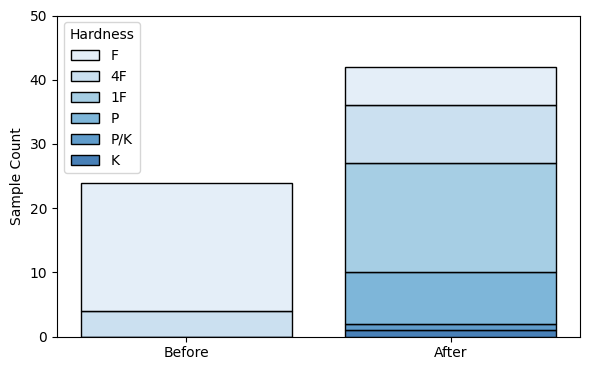

In [128]:
'''Hardness Boxplot'''
fig, ax = plt.subplots(1, 1, figsize = (6, 4), 
                              tight_layout = True)

#Plot data
ax = sns.histplot(stratigraphy, x = 'BeforeAfter', hue = 'Hardness',
             multiple = 'stack', 
             palette = 'Blues',
             shrink=0.8)

ax.set_ylabel('Sample Count')
ax.set_xlabel(' ')
ax.set_ylim(0, 50)

plt.savefig('./plots/hardness-plot.svg')
plt.savefig('./plots/hardness-plot.pdf')
plt.show()

In [130]:
#Filter to top layer
top = stratigraphy[stratigraphy['Layer_no (1 is top)'] == 1]

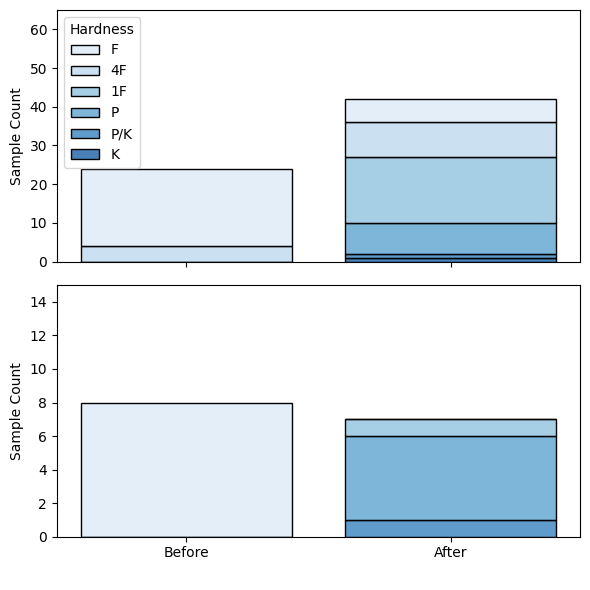

In [141]:
'''Top Layer, Same plot'''
'''Hardness Boxplot'''
fig, [ax, ax1] = plt.subplots(2, 1, figsize = (6, 6), 
                              tight_layout = True, 
                              sharex = True)


#Plot data - All data
sns.histplot(stratigraphy, x = 'BeforeAfter', hue = 'Hardness',
             multiple = 'stack', 
             palette = 'Blues',
             shrink=0.8, 
             ax = ax)

ax.set_ylabel('Sample Count')
ax.set_xlabel(' ')
ax.set_ylim(0, 65)


#Plot data - Top layer
sns.histplot(top, x = 'BeforeAfter', hue = 'Hardness',
             multiple = 'stack', 
             palette = 'Blues',
             shrink=0.8, 
             ax = ax1)

ax1.set_ylabel('Sample Count')
ax1.set_xlabel(' ')
ax1.set_ylim(0, 15)
ax1.get_legend().remove()

plt.savefig('./plots/hardness-top-plot.svg')
plt.savefig('./plots/hardness-top-plot.pdf')
plt.show()

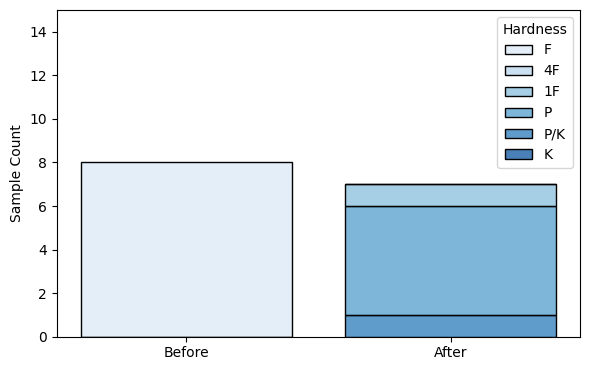

In [138]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4), 
                              tight_layout = True)

#Plot data
ax = sns.histplot(top, x = 'BeforeAfter', hue = 'Hardness',
             multiple = 'stack', 
             palette = 'Blues',
             shrink=0.8)

ax.set_ylabel('Sample Count')
ax.set_xlabel(' ')
ax.set_ylim(0, 15)

plt.savefig('./plots/hardness-top-plot.svg')
plt.savefig('./plots/hardness-top-plot.pdf')
plt.show()

In [75]:
'''Increase Percents'''
before_sd = np.mean(density.TotalDepth_cm[density.BeforeAfter == 'Before'])
after_sd = np.mean(density.TotalDepth_cm[density.BeforeAfter == 'After'])

before_swe = np.mean(density.SWE_site_mm[density.BeforeAfter == 'Before'])
after_swe = np.mean(density.SWE_site_mm[density.BeforeAfter == 'After'])

percSD = (after_sd - before_sd)/before_sd * 100
percSWE = (after_swe - before_swe)/before_swe * 100

In [76]:
percSD

43.215822914531664

In [77]:
percSWE

196.80047694753586